<a href="https://colab.research.google.com/github/KhushiSingla-tech/sentiment_analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleaning Text**

In [ ]:
import string

text = open("text.txt", encoding='utf-8').read()
lower_case = text.lower()

cleaned = lower_case.translate(str.maketrans('','',string.punctuation))
# print(cleaned)

**Tokenize and stop words**

In [ ]:
import requests

token_words = cleaned.split()

stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 

final_words = []

for word in token_words:
  if word not in stopwords:
    final_words.append(word)

# print(final_words)

**Algorithm**

In [ ]:
from collections import Counter
words_list = requests.get("https://gist.githubusercontent.com/KhushiSingla-tech/ff32ac3099122f0c794716236fbe2793/raw/3c5628f355fa016df67f2ac7a97b21db5fd4dc34/emotions.txt").content
words = words_list.decode().splitlines()

emotion_list = []
for line in words:
  clear_line = line.replace("\n","").replace("'","").replace(",","").strip()
  word, emotion = clear_line.split(":")

  if word in final_words:
    emotion_list.append(emotion)

w = Counter(emotion_list)
# print(w)

**Graphical Representation**

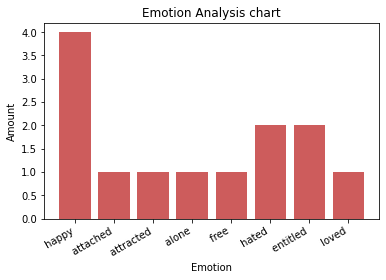

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(w.keys(), w.values(), color = "indianred")
ax.set_xlabel("Emotion")
ax.set_ylabel("Amount")
ax.set_title("Emotion Analysis chart")
fig.autofmt_xdate()
plt.show()

**Postive/Negative/Neutral Vibes**

In [ ]:
nltk.download('vader_lexicon')

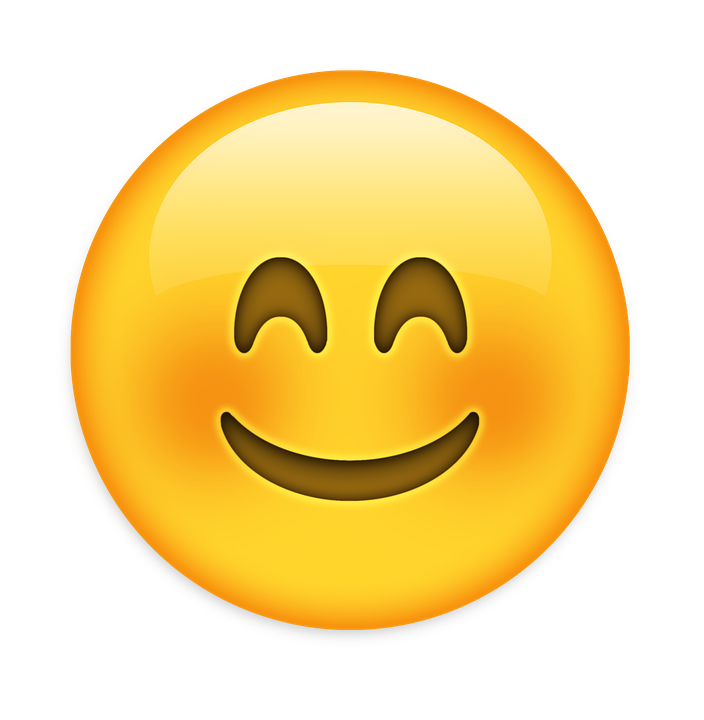

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import Image, display

def sentiment_analyse(sentiment_text):
  score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
  neg = score['neg']
  pos = score['pos']

  if neg > pos:
    display(Image('negative.png', width=100, height=100))
  elif pos > neg:
    display(Image('positive.png', width=100, height=100))
  else:
    display(Image('neutral.png', width=100, height=100))

sentiment_analyse(cleaned)